<a href="https://colab.research.google.com/github/ctarrington/data-science-hw/blob/master/kalman-filters/rlabbe/rlabbe_08_designing_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install filterpy

     |████████████████████████████████| 184kB 2.6MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-cp36-none-any.whl size=110450 sha256=1a690bf3c9b65665a2432b212868a9d0e2221ec160ed252fc5b383f9835e794c
  Stored in directory: /root/.cache/pip/wheels/c3/0c/dd/e92392c3f38a41371602d99fc77d6c1d42aadbf0c6afccdd02
Successfully built filterpy


In [22]:
import math

import numpy as np

from scipy.linalg import block_diag

from matplotlib.pyplot import plot
from matplotlib import pyplot as plt

from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

In [23]:
def data_and_noise_2d(v_x = 1, v_y = 1, a_x = 0, a_y = 0, var = 1, count = 3, seed = 123):
  np.random.seed(seed)

  std = math.sqrt(var)
  xs = np.array([(t * v_x + 0.5 * a_x * t ** 2) for t in range(count)])
  ys = np.array([(t * v_y + 0.5 * a_y * t ** 2) for t in range(count)])
  x_noise = np.array(np.random.normal(0, std, count))
  y_noise = np.array(np.random.normal(0, std, count))

  actuals = np.vstack((xs, ys)).T
  measurements = np.vstack((xs+x_noise, ys+y_noise)).T
  return (actuals, measurements)

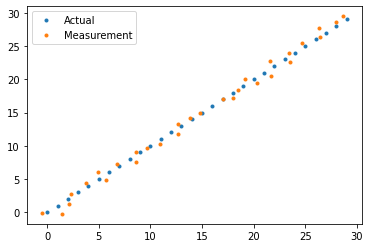

In [24]:
actuals, measurements = data_and_noise_2d(var=0.2, count=30)
plot(actuals[:,0], actuals[:, 1], '.', label='Actual')
plot(measurements[:,0], measurements[:,1], '.', label='Measurement')
plt.legend()
plt.show()

In [26]:
dt = 1
kf = KalmanFilter(dim_x=4, dim_z=2)

kf.F = np.array([[1, dt, 0, 0],
                 [0,  1, 0, 0],
                 [0,  0, 1, dt],
                 [0,  0, 0, 1],
                 ])

q = Q_discrete_white_noise(dim=2, dt=dt, var=0.001)
kf.Q = block_diag(q, q)

kf.H = np.array([[1,0,0,0],
                 [0,0,1,0]])